The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

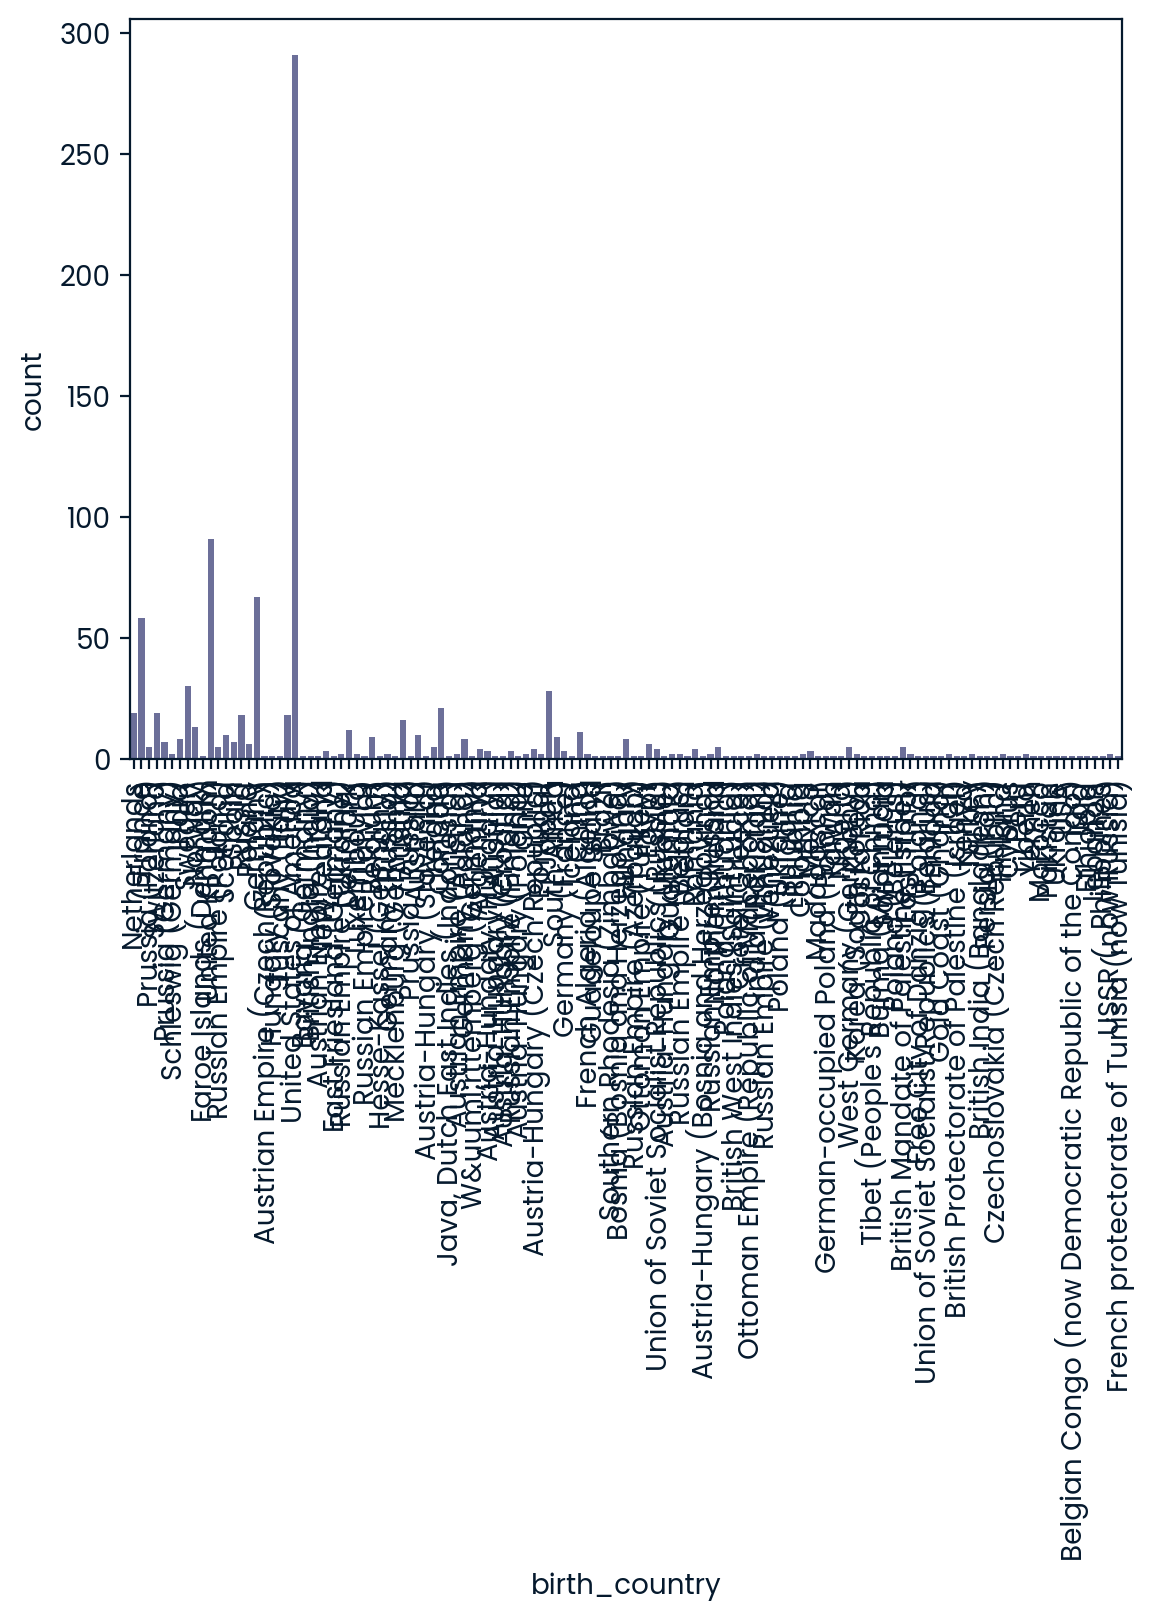

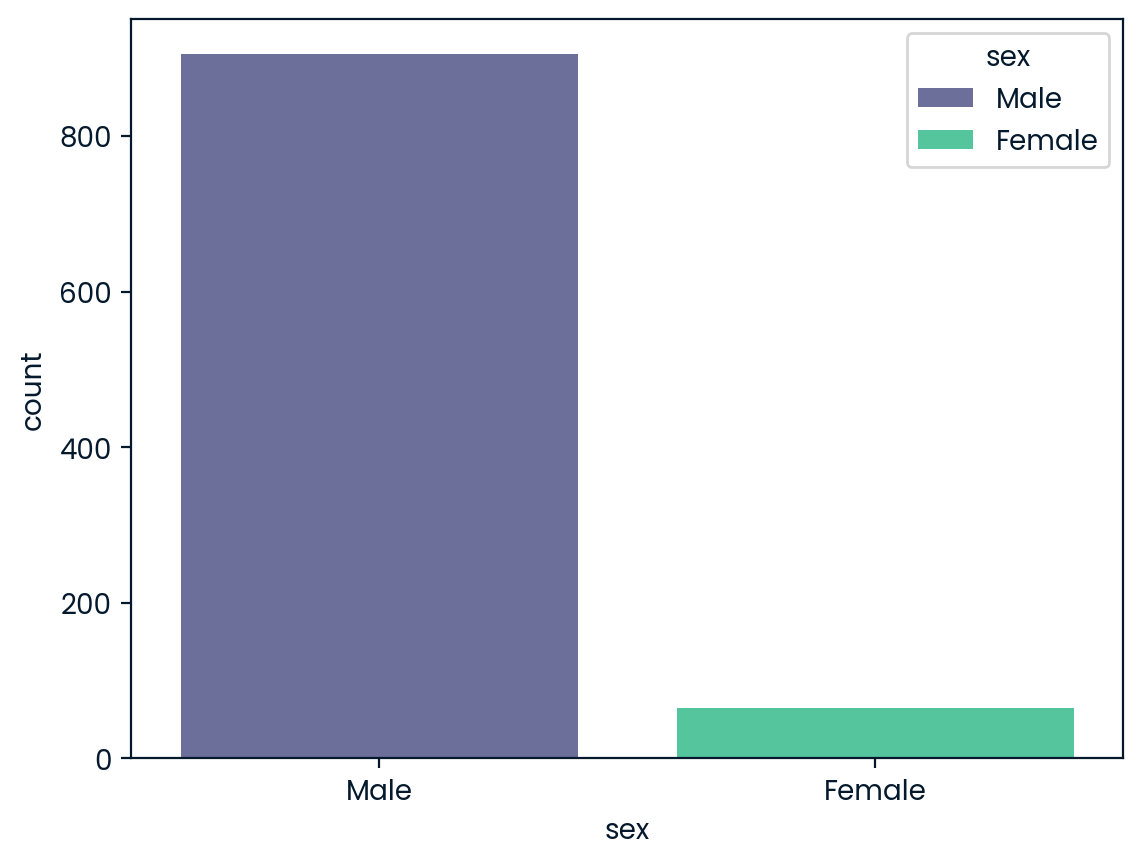

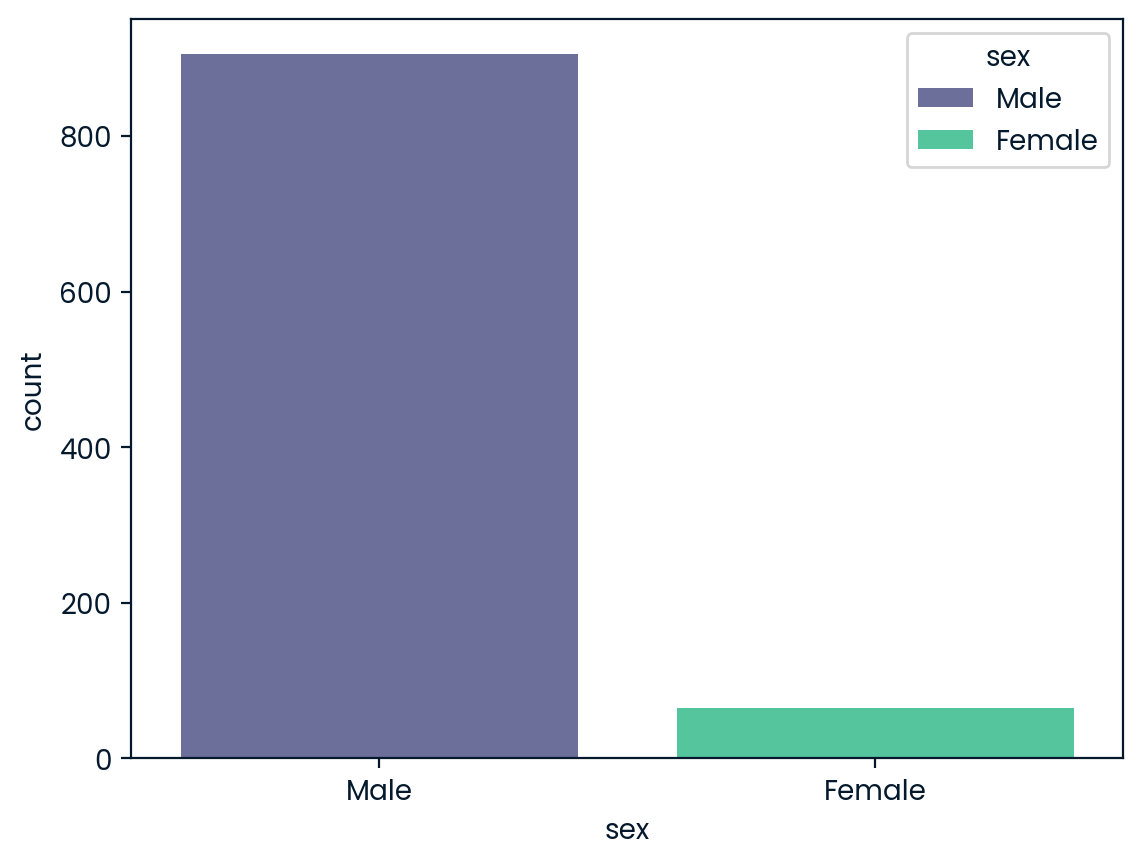

In [210]:
#Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Top gender and country
file_path="data/nobel.csv"
ndata=pd.read_csv(file_path)
ndata.head()
ndata["birth_country"].mode()
sns.countplot(data=ndata, x="birth_country")
plt.xticks(rotation=90)
plt.show()
top_country= str("United States of America")
ndata["sex"].mode()
sns.countplot(data=ndata, x="sex", hue="sex")
plt.show()
top_gender=str("Male")
sns.countplot(data=ndata, x="sex", hue="sex")
plt.show()


2000


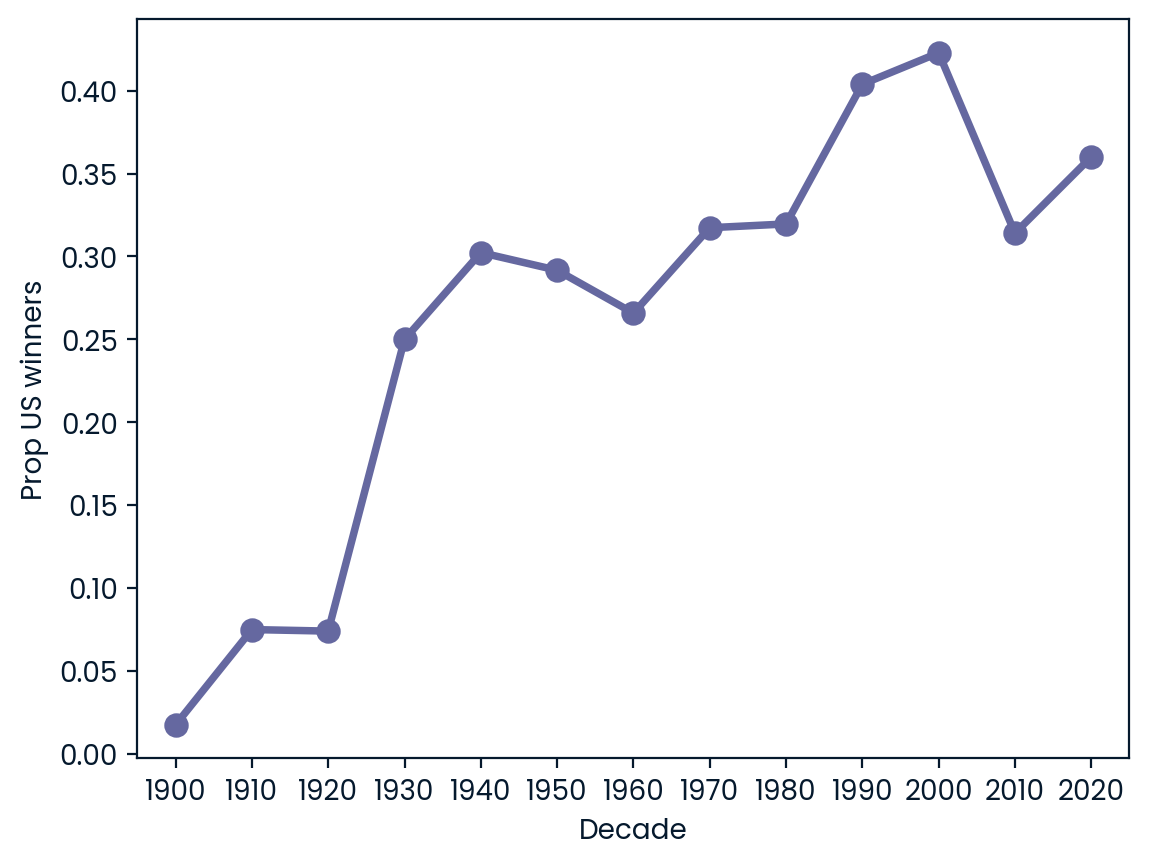

In [211]:
#Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Top decade of highest US-born winners
file_path="data/nobel.csv"
ndata=pd.read_csv(file_path)
small_data= ndata[['year', 'birth_country']]

total_winners=small_data.groupby("year").size()
total_winners= total_winners.reset_index()
total_winners.rename(columns={0:"total winners"}, inplace=True)

US_winners=small_data.groupby('year')['birth_country'].agg(lambda x: (x=="United States of America").sum())
US_winners= US_winners.reset_index()
US_winners.rename(columns={"birth_country":"US winners"}, inplace=True)

decades=[1900]
while decades[-1] <= 2020:
    decade_next=decades[-1]+10
    decades.append(decade_next)

winners_All=pd.DataFrame()
winners_USA=pd.DataFrame()

years=min(decades)
while years < max(decades) :
    All_win = {}
    USA_win = {}
    All_win["Total winners"]= total_winners["total winners"][(total_winners['year'] >= years) & (total_winners['year'] < (years+10))].sum()
    USA_win["USA winners"]= US_winners["US winners"][(US_winners['year'] >= years) & (US_winners['year'] < (years+10))].sum()
    total= (All_win["Total winners"])
    newD=pd.DataFrame([{"Decade": years, "Number of all winners": total}])
    winners_All= pd.concat([winners_All,newD], ignore_index=True)
    newE=pd.DataFrame([{"Decade": years, "USA winners": USA_win["USA winners"]}])
    winners_USA= pd.concat([winners_USA,newE], ignore_index=True)
    years += 10

decade_winners = pd.DataFrame({
    "Decade": winners_All["Decade"],
    "Number of all winners": winners_All["Number of all winners"],
    "Number of US winners": winners_USA["USA winners"],
    "Prop US winners": winners_USA["USA winners"] / winners_All["Number of all winners"]
})

max_decade_usa= int(decade_winners["Decade"][decade_winners["Prop US winners"]==decade_winners["Prop US winners"].max()])
print(max_decade_usa)

sns.pointplot(data=decade_winners, y="Prop US winners", x="Decade")
plt.show()



     year    category  Female winners
0    1901   Chemistry               0
1    1901  Literature               0
2    1901    Medicine               0
3    1901       Peace               0
4    1901     Physics               0
..    ...         ...             ...
616  2023   Economics               1
617  2023  Literature               0
618  2023    Medicine               1
619  2023       Peace               1
620  2023     Physics               1

[621 rows x 3 columns]
      category  total winners  Decade  Female winners  Prop of Female winners
68  Literature              4    2020               2                     0.5
      category  total winners  Decade  Female winners  Prop of Female winners
68  Literature              4    2020               2                0.500000
64       Peace             14    2010               5                0.357143
50  Literature             10    1990               3                0.300000
56  Literature             10    2000               

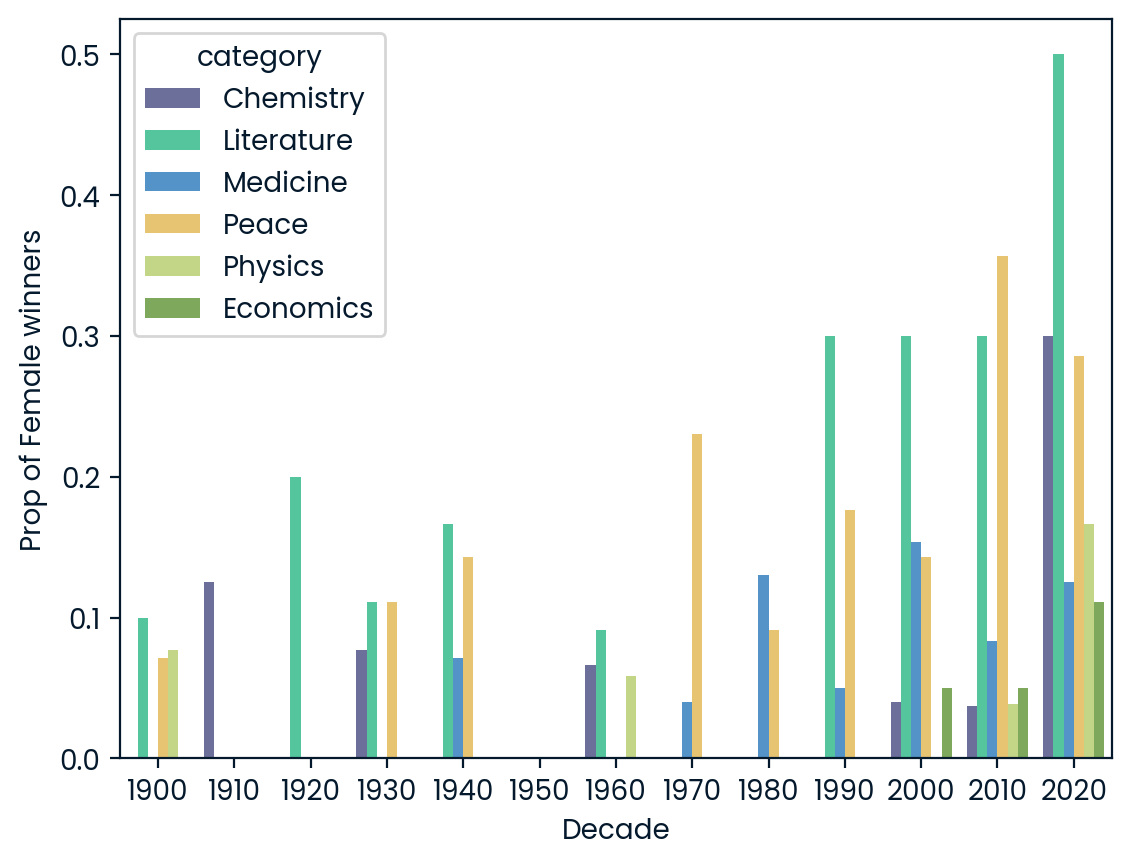

In [212]:
#Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Top gender and country
file_path="data/nobel.csv"
ndata=pd.read_csv(file_path)
ndata.head()

total_winners=ndata.groupby("year").size()
total_winners= total_winners.reset_index()
total_winners.rename(columns={0:"total winners"}, inplace=True)

Female_winners=ndata.groupby(['year', 'category'])['sex'].agg(lambda x: (x=="Female").sum())
Female_winners= Female_winners.reset_index()
Female_winners.rename(columns={'sex':'Female winners'}, inplace=True)
print(Female_winners)
Cat_total_winners=ndata.groupby(["year","category"]).size()
Cat_total_winners= Cat_total_winners.reset_index()
Cat_total_winners.rename(columns={0:"total winners"}, inplace=True)
#print(Cat_total_winners)


decades=[1900]
while decades[-1] <= 2020:
    decade_next=decades[-1]+10
    decades.append(decade_next)
winners_All=pd.DataFrame()
winners_Female= pd.DataFrame()
years=1900
while years < max(decades):
    Selected_Years = (Cat_total_winners['year'] >= years) & (Cat_total_winners['year'] < (years+10))
    All_win = Cat_total_winners[Selected_Years].groupby('category')["total winners"].sum().reset_index()
    All_win["Decade"]= years
    winners_All= pd.concat([winners_All,All_win], ignore_index=True)
    Female_win = Female_winners[Selected_Years].groupby('category')["Female winners"].sum().reset_index()
    Female_win["Decade"]=years
    winners_Female=pd.concat([winners_Female, Female_win], ignore_index=True)
    years += 10

winners_All["Female winners"]=winners_Female["Female winners"]
winners_All["Prop of Female winners"]= winners_All["Female winners"]/winners_All["total winners"]
print(winners_All[winners_All["Prop of Female winners"]==winners_All["Prop of Female winners"].max()])
sns.barplot(data=winners_All, x="Decade", y="Prop of Female winners", hue="category")

winners_All=winners_All.sort_values("Prop of Female winners", ascending=False)
print(winners_All.head())
max_female_dict = dict() #{int(winners_All["Decade"].values[0]): winners_All["category"].values[0]}
max_female_dict= {int(winners_All["Decade"].values[0]) : (str(winners_All["category"].values[0]))}
max_female_dict={int(winners_All["Decade"].values[0]):str(winners_All["category"].values[0])}
print(type(max_female_dict))


In [213]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Top gender and country
file_path="data/nobel.csv"
ndata=pd.read_csv(file_path)
ndata.head()
gender="Male"
indexN=0
while gender != "Female" : 
    gender= ndata.loc[indexN]["sex"]
    indexN +=1
    
print("This is the year of the First Female winner: ", ndata.loc[indexN-1]["year"])
print(ndata.loc[indexN-1])

first_woman_name= str(ndata.loc[indexN-1]["full_name"])
first_woman_category= str(ndata.loc[indexN-1]["category"])
print(type(first_woman_name))
print(type(first_woman_category))

This is the year of the First Female winner:  1903
year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                            

In [214]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Top gender and country
file_path="data/nobel.csv"
ndata=pd.read_csv(file_path)
ndata.head()
repeated_names = ndata["full_name"].value_counts()
repeats= repeated_names[repeated_names>1]
repeats=repeats.reset_index()
repeats=repeats.rename(columns={"index":"name"})
print(repeats["name"].iloc[0])
print(repeats["name"].iloc[1])
repeat_list=[]
print(repeats.shape[0]-1)
for i in range(0, repeats.shape[0]) :
    repeat_list.append(repeats["name"].iloc[i])
print(repeat_list)


Comité international de la Croix Rouge (International Committee of the Red Cross)
Linus Carl Pauling
5
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
